In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Descriptive Statistics

Often, we have the need to summarize a dataset with numbers and/or data visualization. This is where desriptive statistics comes in. For many of you this will be a review. But we will enhance our discussion with real world data from the UCI Machine Repository about concrete quality.

Or we could wine quality [https://archive.ics.uci.edu/ml/datasets/Wine+Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

I will have links to Wikipedia for more information if you want to know more but the Wikipedia content is optional.

## For this exercise, I will give code examples using NumPy and SciPy stats!

## Discrete versus Continuous Values

**Continuous** can take any number. Take heights of mountains as an example.

**Discrete** values take on a selected set of values and no others. Think of the sides of 6-sided die as an example.

## Population versus Sample

A **population** is the set of *all* entities (humans, bacteria in a petri dish, etc) we are studying. Often, though, it is impractical or impossible to measure all entities. In this case we select a **sample** that is a carefully selected subset of the population to study.

A population is described by population *parameters*. A sample is described by sample *statistics*. In data science, we often sample a population and use its statistics to estimate population parameters. In this way we can, to various degrees of confidence, use a sample to describe an entire population. Even better, we may take a sample and use it to predict the future behavior of a population.

## Central tendency

We need to know where the "middle" of a dataset lies. This is what central tendency is. There are few measures of this that are commonly used.

### Mean 

This is the "average" you were taught in elementary school. \\(N\\) as the count of elements in the dataset. This calculation is the same for both populations and samples, though differnt notation is used.

#### Population mean

$$ \mu = \frac{\sum_{i=1}^N x_i}{N} $$

where

+ \\(\mu\\) is the population mean
+ \\(N\\) is the population count

#### Sample mean

$$ \bar x = \frac{\sum_{i=1}^n x_i}{n} $$

where

+ \\(\bar x\\) is the sample mean
+ \\(n\\) is the number of samples

In [2]:
data = np.array([1.0, 9.2, 10.6, 5.2, 15.1])
np.mean(data)

8.219999999999999

### Median

Calculate the median in two steps. First, sort the values from lowest to highest. Next, if the count of values is odd, find the middle value in the sequence. If the count of the values is even, take the mean of the two values in the middle.

In [3]:
data = np.array([1.0, 9.2, 10.6, 5.2, 15.1])
np.median(data)

9.2

### Mode 
This is the value most frequently seen in a dataset.

In [4]:
data = np.array([1, 2, 3, 4, 3, 3, 2])
stats.mode(data)

ModeResult(mode=array([3]), count=array([3]))

## Dispersion

With central tendcney we know where the middle of a dataset is. But often we need to find out how far from the middle the data is spread. We measure this with dispersion.

### Interquartile Range

Consider the median. It cuts the dataset into two pieces. Those two pieces, in turn, can also be cut in half. This gives four **quartiles**.

1. Q1: The middle value between the start and median of the dataset.

1. Median: The median!

1. Q3: The middle value between the median and end of the dataset.

The **interquartile range** (called **IQR**) is the range of values from the beginning of the 2nd quartile to the end of the 3rd quartile. 

If this seems weird when explained in words, don't worry. Here it is graphically, on a normal curve, as created by [Jhguch at en.wikipedia](https://commons.wikimedia.org/wiki/File:Boxplot_vs_PDF.svg). We will also see more box plots below.

![Quartiles and IQR](500px-Boxplot_vs_PDF.png "Quartiles and IQR")

More on IQR can be found at: [https://en.wikipedia.org/wiki/Interquartile_range](https://en.wikipedia.org/wiki/Interquartile_range)

Also, note that other non normal distrubutions will have box plots that are a lot different. 1.5 * IQR is the threshold for outliers in a dataset.

### Variance

Variance is the sum of the squares of the distance from the mean of each individual point. So if points generally tend to steer away from the mean, the variance will increase.

#### Population variance

$$ \sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2}{N} $$

Where:

+ \\(\sigma^2\\) is the population variance
+ \\(\mu\\) is the population mean
+ \\(N\\) is the population count

#### Sample variance

$$ s^2 = \frac{\sum_{i=1}^n (x_i - \bar x)^2}{n-1} $$

Where:

+ \\(s^2\\) is the sample variance
+ \\(\bar x\\) is the population mean
+ \\(n\\) is the population count

You may notice that the denomiator is \\(n-1\\). This is called Bessel's correction. It is used when calculating the variance of samples. You can dive down the rabbit hole on Wikipedia.

A couple of notes about variance: First, the distances are squared so that the variance always adds to a positive sum. Second, the *the units in which the original data was measured are squared!* This means that the variance cannot be interpreted in terms of the units of the original measurements.

Wikipedia has more about variance at: [https://en.wikipedia.org/wiki/Variance](https://en.wikipedia.org/wiki/Variance)

It is nice to be able to view the dispersion in terms of the original measurement units. That is where standard deviation comes in.

### Standard deviation

Standard deviation is simply the square root of the variance:

#### Population standard deviation

$$ \sigma = \sqrt{\frac{\sum_{i=1}^N (x_i - \mu)^2}{N}} $$

Where:

+ \\(\sigma\\) is the population standard deviation
+ \\(\mu\\) is the population mean
+ \\(N\\) is the population count

You will also see something similar in concept to standard deviation called *standard error of the mean* in the sampling lesson, when we build confidence intervals.

#### Sample standard deviation

$$ s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar x)^2}{n-1}} $$

Where:

+ \\(s\\) is the sample standard deviation
+ \\(\bar x\\) is the population mean
+ \\(n\\) is the population count

### Want more?!

For more on Standard deviation and variance, and Bessel's correction head over to Wikipedia:

+ [https://en.wikipedia.org/wiki/Bessel%27s_correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)
+ [https://en.wikipedia.org/wiki/Standard_deviation](https://en.wikipedia.org/wiki/Standard_deviation)
+ [https://en.wikipedia.org/wiki/Variance](https://en.wikipedia.org/wiki/Variance)

In the "Normal Distribution" lesson, you will see how increasing or decreasing standard deviation (or variance) affects the shape of the data.

# Explore Red Wine

This is a dataset about chemical analyses of red wine.

### pH and density are very normally distributed

Their mean and median are very close and they are symmetrical.

### alcohol and fixed acidity are skewed

The mean and median are separated

### histograms and binning

We will see what binning and histrograms do here.

In [20]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')
df3 = df[['pH', 'alcohol', 'density', 'fixed acidity']]

Get basic summary statitics for the 4 columns we are looking at. We see the number of calues, mean, standard deviation, quartiles, minimums and maximums

In [16]:
df3.describe()

,pH,alcohol,density,fixed acidity
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.311113,10.422983,0.996747,8.319637
std,0.154386,1.065668,0.001887,1.741096
min,2.740000,8.400000,0.990070,4.600000
25%,3.210000,9.500000,0.995600,7.100000
50%,3.310000,10.200000,0.996750,7.900000
75%,3.400000,11.100000,0.997835,9.200000
max,4.010000,14.900000,1.003690,15.900000


/Users/alicia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


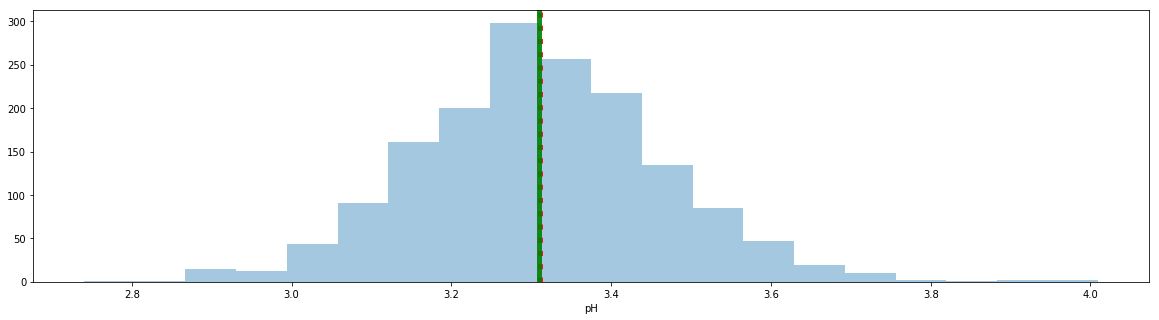

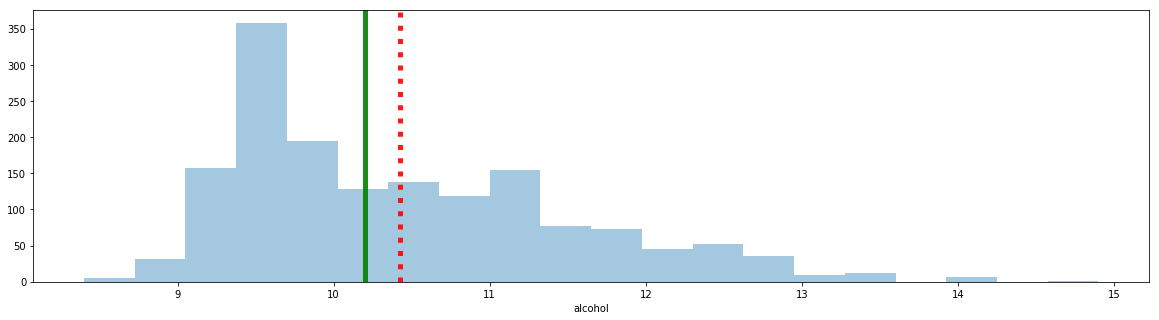

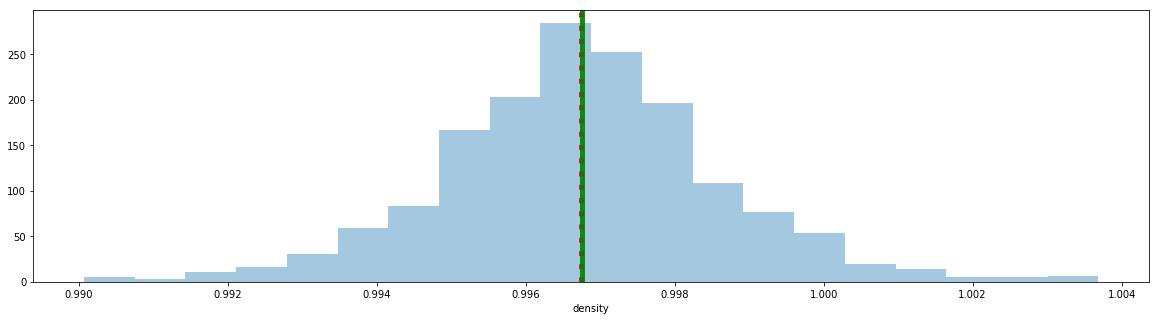

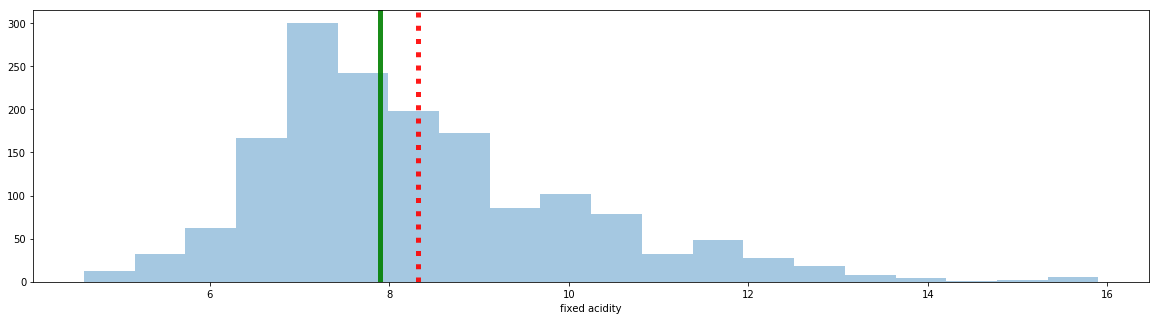

In [19]:
bins = 20
cols = df3.columns
for col in df3.columns:
    plt.figure(figsize=(20,5))
    ax = sns.distplot(df3[col], bins=bins, kde=False)
    ax.axvline(x=df3[col].mean(), ymin=0.0, ymax=1.0, color='red', ls=':', lw=5.0, alpha=0.9)
    ax.axvline(x=df3[col].median(), ymin=0.0, ymax=1.0, color='green', ls='-', lw=5.0, alpha=0.9)